# Clustering Policy Environments for Women in a Declining Population

In this notebook, I'm using k-means clustering to explore whether groups of countries share similar patterns when it comes to supporting mothers, protecting reproductive rights, and ensuring women's safety.

I'm especially interested in seeing whether the data reveals contradictions like countries that ask a lot from women (higher birth rates) but provide little in terms of actual support or legal protections.

The goal here isn’t to predict an outcome, but to uncover hidden patterns in how governments structure motherhood. Hopefully, these clusters will help me see the bigger picture behind the numbers.

## Table of Contents

1. [Import Libraries](#1-import-libraries)  
2. [Load Data](#2-load-data)  
3. [Data Cleaning](#3-data-cleaning)  
4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)  
5. [Feature Scaling](#5-feature-scaling)  
6. [The Elbow Method](#6-the-elbow-method)  
7. [Run K-Means Clustering](#7-run-k-means-clustering)  
8. [Visualize the Clusters](#8-visualize-the-clusters)  
9. [Descriptive Stats by Cluster](#9-descriptive-stats-by-cluster)  
10. [Reflections & Next Steps](#10-reflections-&-next-steps)

---

## 1. Import Libraries

In [7]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Set visualization style
sns.set(style="whitegrid")

---

## 2. Load Data

In [72]:
# Load the final merged dataset
df = pd.read_csv('D:/YVC/Data Analytics (CF)/Advanced Analytics & Dashboard Design/Project Analysis/02 Data/Prepared Data/final_merged_data.csv')

# Preview the first few rows
df.head()

,Country,Total_Benefits,Cash,Services,Tax_Breaks,Childcare_0_2,Childcare_3_5,Early_Education,Fertility_Rate
0,France,3.439601,1.335785,1.376677,0.727139,1.264842,0.597573,0.667269,1.639
1,Sweden,3.420961,1.290414,2.130547,0.000000,1.563593,1.029800,0.533793,1.430
2,Denmark,3.313367,1.268997,2.044370,0.000000,1.238141,0.796111,0.442030,1.511
3,Norway,3.276841,1.224974,1.962067,0.089800,1.376063,0.653655,0.722408,1.405
4,Germany,3.240882,1.075665,1.344086,0.821131,0.750781,0.243525,0.507256,1.441


---

## 3. Data Cleaning
Before jumping into clustering, I need to get the data ready. In this step, I'm removing anything that can't go into the algorithm—like text columns—and double-checking that everything is numeric and clean. This will make sure I'm feeding the model the right stuff.

In [19]:
# Drop the 'Country' column since it's not numeric and can't be used in clustering
features = df.drop(columns=['Country'])

# Preview the data thats going into the model
features.head()

,Total_Benefits,Cash,Services,Tax_Breaks,Childcare_0_2,Childcare_3_5,Early_Education,Fertility_Rate
0,3.439601,1.335785,1.376677,0.727139,1.264842,0.597573,0.667269,1.639
1,3.420961,1.290414,2.130547,0.000000,1.563593,1.029800,0.533793,1.430
2,3.313367,1.268997,2.044370,0.000000,1.238141,0.796111,0.442030,1.511
3,3.276841,1.224974,1.962067,0.089800,1.376063,0.653655,0.722408,1.405
4,3.240882,1.075665,1.344086,0.821131,0.750781,0.243525,0.507256,1.441


Now that I’ve removed the `Country` column, I’m left with just the numeric variables that will go into the clustering model. These cover support systems like cash benefits, childcare access, and early education plus fertility rates. Everything here is quantitative and ready for the next steps.

---

## 4. Exploratory Data Analysis (EDA)

This section checks for missing values and gives a quick summary of how each feature is distributed. It helps identify any unexpected values, large skews, or patterns that could affect clustering performance.

In [26]:
# Check for missing values
features.isnull().sum()

# Summary statistics
features.describe()

,Total_Benefits,Cash,Services,Tax_Breaks,Childcare_0_2,Childcare_3_5,Early_Education,Fertility_Rate
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2.463018,1.026722,1.203438,0.232858,0.826050,0.289957,0.536092,1.464278
std,0.861618,0.499630,0.507402,0.286539,0.355355,0.304310,0.151983,0.188995
min,0.625878,0.057431,0.525979,0.000000,0.343599,0.020287,0.253316,1.198000
25%,1.863826,0.731810,0.859829,0.000000,0.528751,0.060043,0.458084,1.348250
50%,2.568068,1.246986,1.072132,0.083935,0.776216,0.153242,0.520524,1.435500
75%,3.224686,1.368547,1.471524,0.415662,1.067626,0.496579,0.662976,1.608000
max,3.439601,1.661416,2.130547,0.821131,1.563593,1.029800,0.797505,1.910000


To complete this quick EDA, a histogram will show how each feature is distributed. This helps confirm whether standardization is needed and highlights any strong skews that could affect the clustering process.


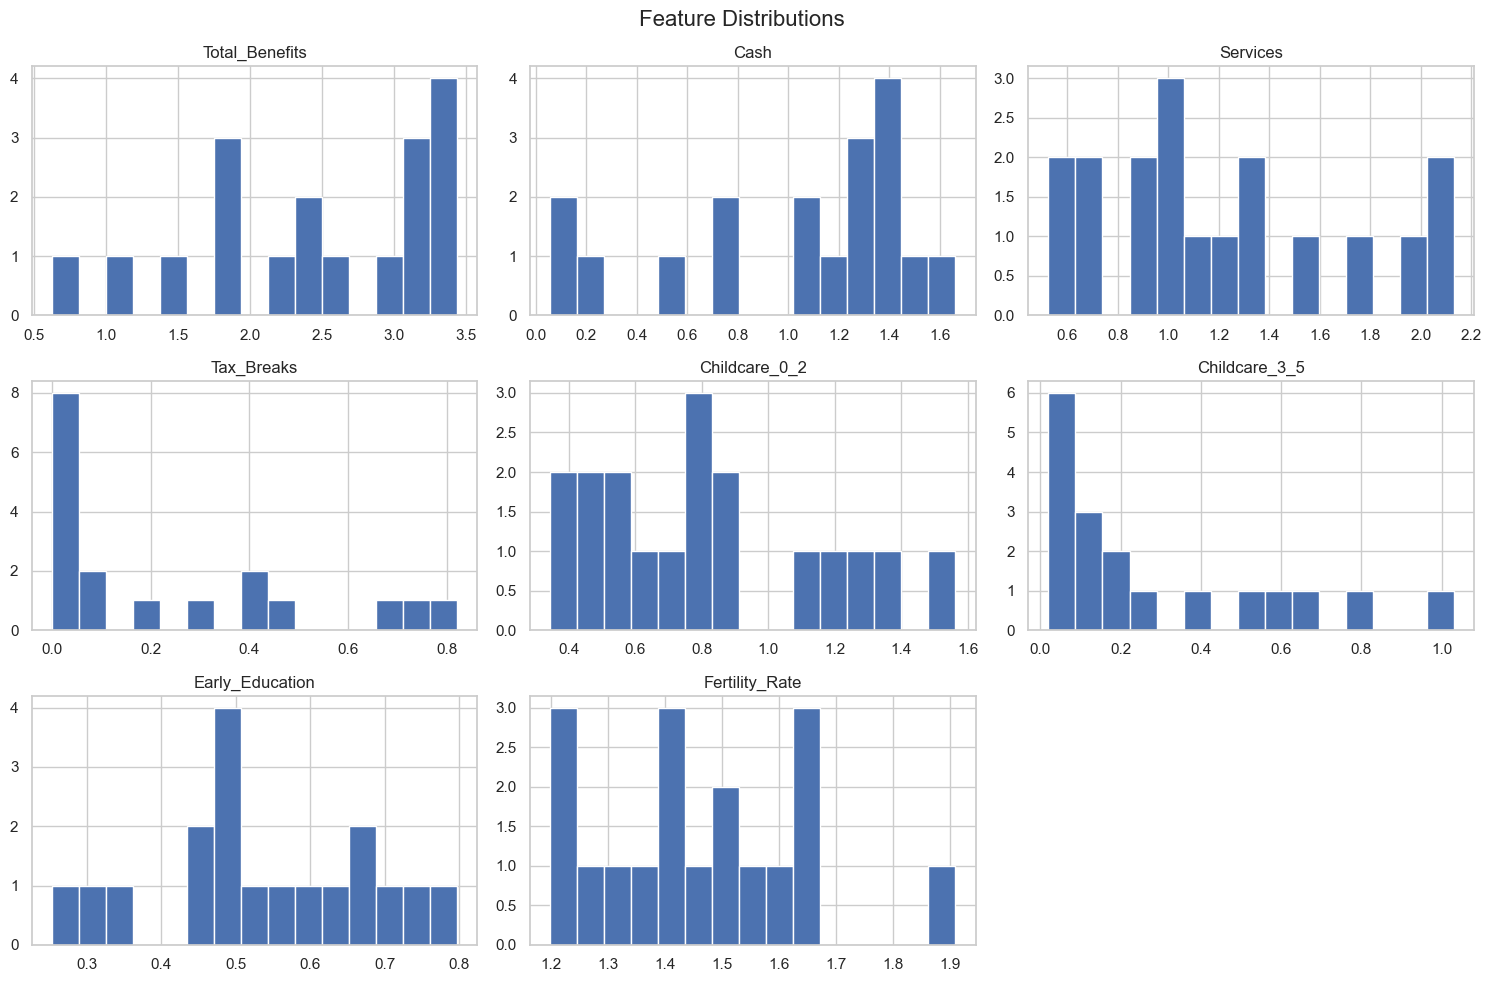

In [29]:
# Plot histograms for all features
features.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

The histograms show how each feature is distributed across the dataset. A few important patterns stand out:

- `Total_Benefits`, `Cash`, and `Services` have fairly wide spreads, with some visible skew this suggests countries differ quite a bit in these areas.
- `Tax_Breaks` and `Childcare_3_5` are heavily skewed toward lower values, with many countries offering very little support in those categories.
- `Childcare_0_2` is more balanced, but still leans left.
- `Early_Education` and `Fertility_Rate` show moderate clustering around the middle, but still with a decent range.

The features are on different scales and vary in shape, confirming the need for standardization before clustering.

---

## 5. Feature Scaling

The variables in this dataset are on different scales, which would bias the clustering algorithm. Standardization adjusts each feature so that it has a mean of 0 and a standard deviation of 1, making them equally weighted during clustering.


In [35]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Turn the result back into a DataFrame with the same column names
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Preview the scaled data
scaled_df.head()

,Total_Benefits,Cash,Services,Tax_Breaks,Childcare_0_2,Childcare_3_5,Early_Education,Fertility_Rate
0,1.166290,0.636518,0.351322,1.775014,1.270597,1.040169,0.888127,0.951284
1,1.144029,0.543076,1.880141,-0.836217,2.135682,2.501702,-0.015571,-0.186627
2,1.015534,0.498969,1.705377,-0.836217,1.193280,1.711506,-0.636846,0.254381
3,0.971912,0.408301,1.538471,-0.513737,1.592657,1.229806,1.261443,-0.322741
4,0.928968,0.100800,0.285229,2.112547,-0.217954,-0.157007,-0.195236,-0.126737


---

## 6. The Elbow Method

To figure out how many clusters make the most sense for this dataset, the elbow method will be used. This technique runs the k-means algorithm for a range of cluster values and tracks the "inertia" (how tightly grouped the clusters are). The optimal number of clusters is found at the point where adding more clusters doesn't significantly improve the inertia this point looks like an "elbow" in the graph.

In [45]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.cluster._kmeans')

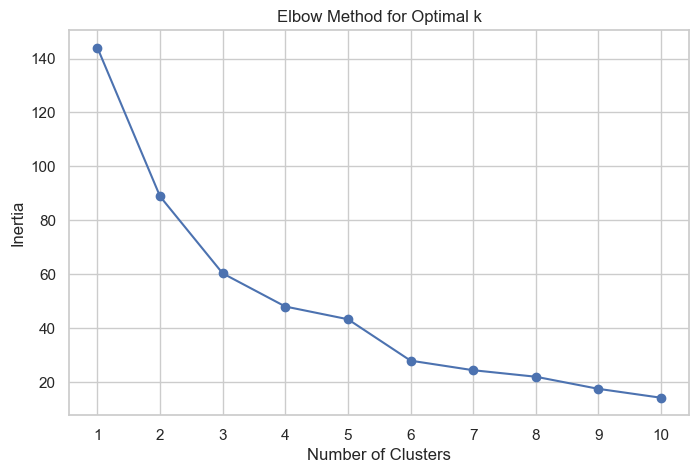

In [47]:
# Try different numbers of clusters and calculate the inertia
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True)
plt.show()

---

## 7. Run K-Means Clustering

Now that the data is scaled and ready, it’s time to apply the k-means clustering algorithm.  
The number of clusters (k) is based on the elbow method from the previous step.  

This section initializes the model, fits it to the scaled data, and assigns each country to a cluster.  
The cluster labels are added to both the scaled dataset and the original dataset to make it easier to visualize and interpret later on.

In [70]:
# Initialize the KMeans model with the optimal number of clusters (based on the elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and predict cluster labels
clusters = kmeans.fit_predict(scaled_df)

# Add the cluster labels to the scaled and original dataframes
scaled_df['Cluster'] = clusters
df['Cluster'] = clusters

# Preview the updated dataframes
scaled_df.head(), df.head()

(   Total_Benefits      Cash  Services  Tax_Breaks  Childcare_0_2  \
 0        1.166290  0.636518  0.351322    1.775014       1.270597   
 1        1.144029  0.543076  1.880141   -0.836217       2.135682   
 2        1.015534  0.498969  1.705377   -0.836217       1.193280   
 3        0.971912  0.408301  1.538471   -0.513737       1.592657   
 4        0.928968  0.100800  0.285229    2.112547      -0.217954   
 
    Childcare_3_5  Early_Education  Fertility_Rate  Cluster  
 0       1.040169         0.888127        0.951284        0  
 1       2.501702        -0.015571       -0.186627        2  
 2       1.711506        -0.636846        0.254381        2  
 3       1.229806         1.261443       -0.322741        2  
 4      -0.157007        -0.195236       -0.126737        0  ,
    Country  Total_Benefits      Cash  Services  Tax_Breaks  Childcare_0_2  \
 0   France        3.439601  1.335785  1.376677    0.727139       1.264842   
 1   Sweden        3.420961  1.290414  2.130547    0.00

---

## 8. Visualize the Clusters

Now that the clustering is done, it's time to explore how the countries are grouped. These scatterplots show how the clusters separate across different feature combinations. Each color represents one cluster, and this helps reveal which patterns or country groupings stand out the most.

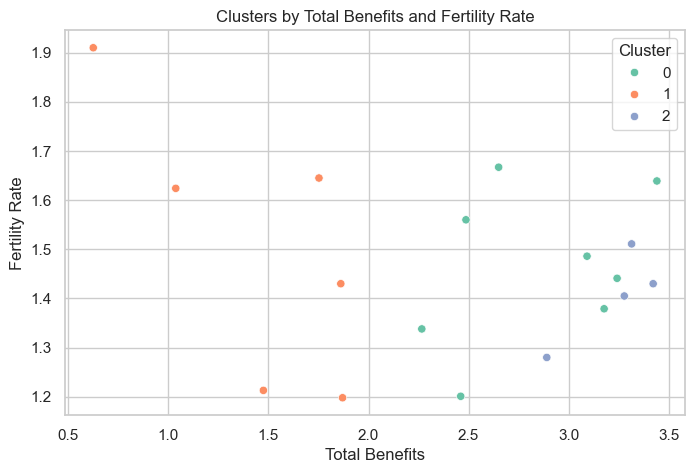

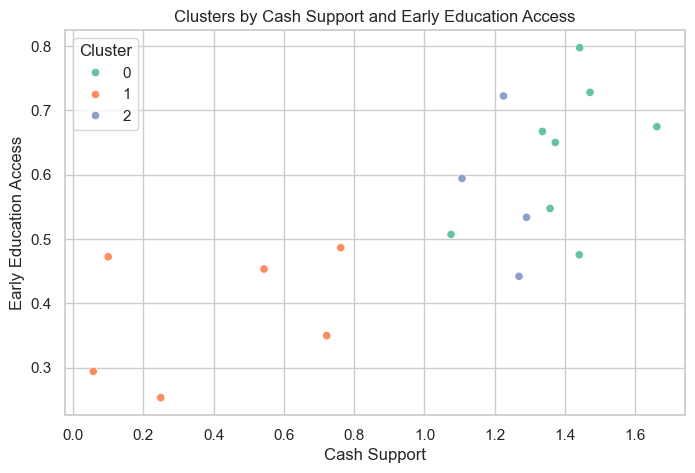

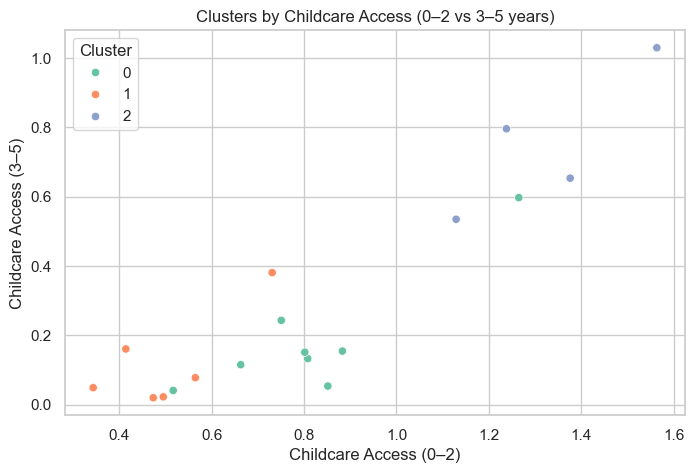

In [55]:
# Set up color palette for clarity
palette = sns.color_palette("Set2", n_colors=3)

# Plot 1: Total Benefits vs Fertility Rate
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Total_Benefits', y='Fertility_Rate', hue='Cluster', palette=palette)
plt.title('Clusters by Total Benefits and Fertility Rate')
plt.xlabel('Total Benefits')
plt.ylabel('Fertility Rate')
plt.legend(title='Cluster')
plt.show()

# Plot 2: Cash Support vs Early Education
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Cash', y='Early_Education', hue='Cluster', palette=palette)
plt.title('Clusters by Cash Support and Early Education Access')
plt.xlabel('Cash Support')
plt.ylabel('Early Education Access')
plt.legend(title='Cluster')
plt.show()

# Plot 3: Childcare (0–2) vs Childcare (3–5)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Childcare_0_2', y='Childcare_3_5', hue='Cluster', palette=palette)
plt.title('Clusters by Childcare Access (0–2 vs 3–5 years)')
plt.xlabel('Childcare Access (0–2)')
plt.ylabel('Childcare Access (3–5)')
plt.legend(title='Cluster')
plt.show()

### Cluster Visualizations

These scatterplots break down how the countries cluster based on different combinations of support systems and fertility rates. Each dot represents a country, and the color shows which cluster it belongs to.

- **Plot 1: Total Benefits vs Fertility Rate**  
  This view shows a visible gradient where higher total benefits tend to align with lower fertility rates (blue cluster). On the opposite side, countries with lower benefits and higher fertility (orange cluster) group separately. This may suggest different policy strategies or stages of demographic transition.

- **Plot 2: Cash Support vs Early Education Access**  
  Clusters form in a similar pattern, where countries with more investment in both areas group together. Those with minimal cash support and lower early education access are separated into a distinct group.

- **Plot 3: Childcare Access (0–2 vs 3–5 years)**  
  There's a noticeable divide in childcare access. One cluster includes countries with very limited access across both age groups (Cluster 0), while another group tends to offer moderate to high access across the board (Clusters 1 and 2).

Together, these plots give a clearer picture of how different countries' support systems align—and how they might be approaching the motherhood/fertility challenge from very different angles.

---

## 9. Descriptive Stats by Cluster

Now that each country has been assigned to a cluster, this step summarizes the average characteristics of each group.
The data is grouped by cluster number, and the mean values for each variable are calculated.

This helps reveal the typical policy and outcome patterns within each cluster for example, which clusters offer more
support for families, or which tend to have higher or lower fertility rates.

These profiles will make it easier to interpret what each cluster represents in the real world.

In [68]:
# Select only numeric columns for aggregation
numeric_cols = df.select_dtypes(include='number')

# Group by cluster and calculate mean values
cluster_profiles = numeric_cols.groupby(df['Cluster']).mean().round(2)

# Display the profiles
cluster_profiles

,Total_Benefits,Cash,Services,Tax_Breaks,Childcare_0_2,Childcare_3_5,Early_Education,Fertility_Rate,Cluster
Cluster,,,,,,,,,
0,2.85,1.39,1.11,0.34,0.82,0.19,0.63,1.46,0.0
1,1.44,0.41,0.81,0.23,0.50,0.12,0.38,1.50,1.0
2,3.23,1.22,1.98,0.02,1.33,0.75,0.57,1.41,2.0


### Cluster Descriptive Stats

This section summarizes the average values for each variable within each cluster. Grouping the data this way helps reveal patterns in how different countries structure their support systems and the fertility outcomes associated with them.

- **Cluster 0**: Represents countries with moderately high support across most variables—relatively generous total benefits, decent cash and service provisions, and good early education access. Fertility rates are also balanced here.

- **Cluster 1**: Contains countries with the lowest support across the board—limited benefits, low childcare access, and minimal investment in early education. Surprisingly, this cluster shows the highest average fertility rate, which could point to cultural or structural differences not captured in the variables.

- **Cluster 2**: Includes the most generous group in terms of benefits and childcare access, especially for younger children (0–2 and 3–5). Early education and service access are also high. Despite this, fertility rates are not significantly higher, which might suggest policy lag effects or deeper demographic shifts.

Together, these profiles create a foundation for interpreting what each cluster might mean in policy terms—like which models prioritize family investment, and which might be under pressure despite higher fertility.

---

## 10. Reflections & Next Steps

This clustering exercise uncovered distinct patterns in how countries approach the challenge of supporting families and addressing fertility decline. The model sorted countries into groups based on the level and type of investment in childcare, education, and family benefits and the patterns weren’t always what might be expected.

Some countries with strong support systems still had lower fertility rates, suggesting that financial or structural help alone might not be enough. Meanwhile, countries with fewer supports showed higher fertility, possibly pointing to cultural norms or policies not captured here. This reinforces that fertility policy isn’t a one-size-fits-all situation it’s influenced by context, values, and long-term planning.

**Next steps** could include:
- Digging deeper into countries that sit on the edges of these clusters to see what’s driving them.
- Adding new variables like gender equality or cultural indicators to refine the clustering.
- Comparing these results with earlier regression findings to spot overlap or contradictions.

Clustering helped surface hidden patterns that aren’t obvious from summary stats or individual visualizations. These groupings can guide where to look next for meaningful policy lessons.